# Bloc Exploration & Analysis

This notebook explores the Color Pattern Blocs in the Squares public data.

## Setup

In [7]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from supabase import create_client, Client

# Load environment variables
load_dotenv(os.path.join(os.path.dirname(os.getcwd()), '.env.development.local'))

# Set up plotting
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Initialize Supabase
url = os.environ.get('NEXT_PUBLIC_SUPABASE_URL')
key = os.environ.get('NEXT_PUBLIC_SUPABASE_ANON_KEY')
if not url or not key:
    raise ValueError('Missing Supabase credentials')
supabase = create_client(url, key)
print('‚úÖ Setup complete')

‚úÖ Setup complete


## Load Data

In [8]:
# Query public spectrum data
response = supabase.table('public_farcaster_spectrums').select('*').execute()
df = pd.DataFrame(response.data)
print(f'Loaded {len(df)} user spectrums')
print(f'Columns: {list(df.columns)}')
df.head()

Loaded 89 user spectrums
Columns: ['id', 'fid', 'username', 'display_name', 'pfp_url', 'trade_score', 'abortion_score', 'migration_score', 'economics_score', 'rights_score', 'times_updated', 'created_at', 'updated_at', 'divergence_score', 'spread_score']


id     fid  username display_name  \
0  2a1df2ee-b9a4-4d14-8b8a-191d3bbe9460  352478   chronor      chronor   
1  a0b43a0c-c5ef-4426-8d7a-a01506b0ab3b  392746       0wn       0x0 üé©üîµ   
2  9b53aedd-caea-474a-9c35-1bb9b5288aa5  797945     t9let        T9LET   
3  420ee4d7-8df9-40e0-bb7b-58efdb77b890  284618  brennuet     bren üëÅÔ∏èü™Ω   
4  1ee9239c-bdc0-48ed-95a3-4b5bc5b9eb7e  250191    ipingo   ipingo.eth   

                                             pfp_url  trade_score  \
0  https://imagedelivery.net/BXluQx4ige9GuW0Ia56B...            0   
1  https://imagedelivery.net/BXluQx4ige9GuW0Ia56B...            0   
2  https://imagedelivery.net/BXluQx4ige9GuW0Ia56B...            3   
3  https://imagedelivery.net/BXluQx4ige9GuW0Ia56B...            4   
4  https://imagedelivery.net/BXluQx4ige9GuW0Ia56B...            0   

   abortion_score  migration_score  economics_score  rights_score  \
0               1                5                2             3   
1               0                0                0             0   
2               4                3                3             0   
3               0                0                5             0   
4               5                2                4             3   

   times_updated                        created_at  \
0              2  2025-10-19T04:17:30.366141+00:00   
1              2  2025-10-18T09:58:22.936647+00:00   
2              3  2025-10-18T03:52:37.945627+00:00   
3              2  2025-10-18T03:31:57.595152+00:00   
4              2  2025-10-18T02:48:57.681623+00:00   

                         updated_at  divergence_score  spread_score  
0  2025-10-19T04:18:17.674107+00:00          1.897367      1.720465  
1  2025-10-18T09:58:31.269215+00:00          3.000000      0.000000  
2  2025-10-18T03:55:32.386276+00:00          1.414214      1.356466  
3  2025-10-18T03:32:03.740194+00:00          2.529822      2.227106  
4  2025-10-18T02:49:05.127238+00:00          1.732051      1.720465

## Define Bloc Membership Criteria

In [9]:
# Import bloc configuration
sys.path.append(os.path.dirname(os.getcwd()))
from analytics.bloc_config import BLOC_NAMES, BLOC_DESCRIPTIONS

dimensions = ['trade_score', 'abortion_score', 'migration_score', 'economics_score', 'rights_score']

def get_scores(row):
    return [row[dim] for dim in dimensions]

# BLOC DEFINITIONS
# Rule: ‚â•3 dimensions in bloc color range
# Color spectrum: 0=purple, 1=blue, 2=green, 3=yellow, 4=orange, 5=red, 6=black

def post_scarcity(row):
    scores = get_scores(row)
    return sum(1 for s in scores if 0 <= s <= 1) >= 3

def builder_bloc(row):
    scores = get_scores(row)
    return sum(1 for s in scores if 1 <= s <= 2) >= 3

def abundance_alliance(row):
    scores = get_scores(row)
    return sum(1 for s in scores if 1 <= s <= 3) >= 3

def localist_league(row):
    scores = get_scores(row)
    return sum(1 for s in scores if 3 <= s <= 5) >= 3

def natcon_corps(row):
    scores = get_scores(row)
    return sum(1 for s in scores if 4 <= s <= 5) >= 3

def postliberal_front(row):
    scores = get_scores(row)
    in_range = sum(1 for s in scores if 5 <= s <= 6)
    very_high = sum(1 for s in scores if s >= 5)
    return in_range >= 3 and very_high >= 2

# Apply memberships
df['post_scarcity'] = df.apply(post_scarcity, axis=1)
df['builder_bloc'] = df.apply(builder_bloc, axis=1)
df['abundance_alliance'] = df.apply(abundance_alliance, axis=1)
df['localist_league'] = df.apply(localist_league, axis=1)
df['natcon_corps'] = df.apply(natcon_corps, axis=1)
df['postliberal_front'] = df.apply(postliberal_front, axis=1)

bloc_columns = list(BLOC_NAMES.keys())
print(f'‚úÖ Bloc memberships calculated ({len(bloc_columns)} blocs)')

‚úÖ Bloc memberships calculated (6 blocs)


## Bloc Membership Distribution

Bloc Membership Counts:\n
                  Bloc  Count  Percentage
    Abundance Alliance     45       50.56
Postscarcity Syndicate     40       44.94
          Builder Bloc     22       24.72
       Localist League     22       24.72
          NatCon Corps      2        2.25
     Postliberal Front      1        1.12
\nUsers in at least one bloc: 82 (92.1%)
Orphaned users: 7 (7.9%)


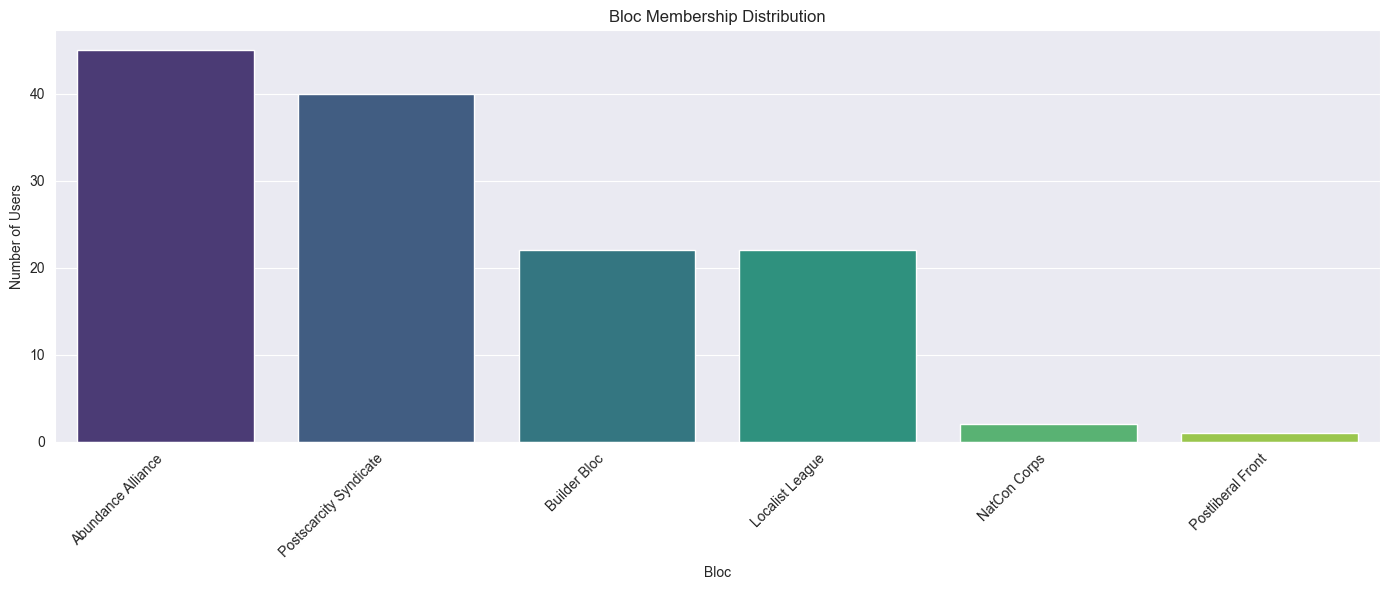

In [10]:
bloc_counts = {BLOC_NAMES[col]: df[col].sum() for col in bloc_columns}
bloc_df = pd.DataFrame(list(bloc_counts.items()), columns=['Bloc', 'Count'])
bloc_df['Percentage'] = (bloc_df['Count'] / len(df) * 100).round(2)
bloc_df = bloc_df.sort_values('Count', ascending=False)

print('Bloc Membership Counts:\\n')
print(bloc_df.to_string(index=False))

# Coverage
df['in_any_bloc'] = df[bloc_columns].any(axis=1)
users_in_bloc = df['in_any_bloc'].sum()
print(f'\\nUsers in at least one bloc: {users_in_bloc} ({users_in_bloc/len(df)*100:.1f}%)')
print(f'Orphaned users: {len(df)-users_in_bloc} ({(len(df)-users_in_bloc)/len(df)*100:.1f}%)')

# Visualize
plt.figure(figsize=(14, 6))
sns.barplot(data=bloc_df, x='Bloc', y='Count', hue='Bloc', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Bloc Membership Distribution')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

## Near Miss Analysis

Exploring users who were close to bloc membership (2 out of 3 required dimensions)

NEAR MISS ANALYSIS

üìå Users with 2/3 required dimensions per bloc:

               Bloc  Near Misses
    Localist League           33
 Abundance Alliance           28
Post-Scarcity Front           22
       Builder Bloc           21
       NatCon Corps           19
  Postliberal Front            5

üéØ Users with multiple near misses: 65

üìã Top 10 users closest to multiple blocs:

      username  total_near_misses  trade_score  abortion_score  migration_score  economics_score  rights_score
       tohpac1                  5            0               1                2                5             4
   peachybyrne                  4            1               0                1                5             4
       chronor                  3            0               1                5                2             3
       homer27                  3            3               3                1                0             2
      adaninie                  3            1        

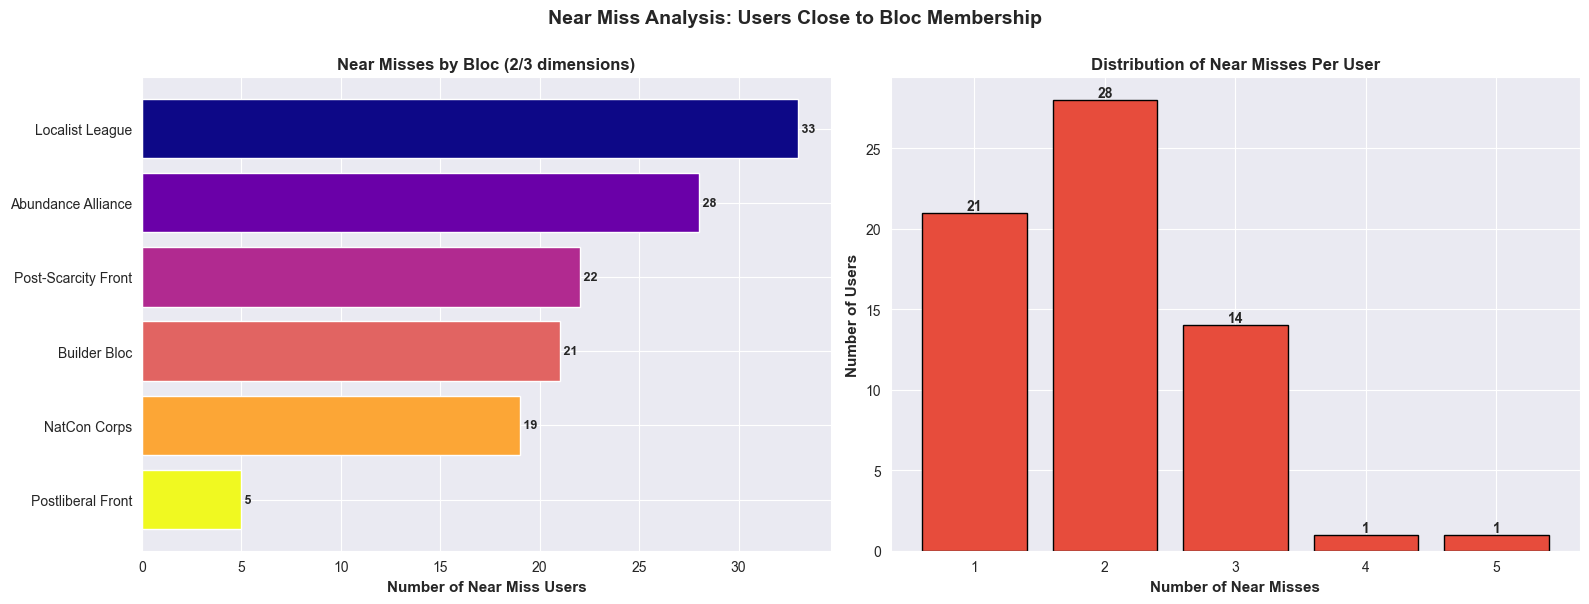


‚úÖ Near miss analysis complete!


In [11]:
# Calculate near misses for each bloc
def count_dimensions_in_range(row, min_val, max_val):
    scores = get_scores(row)
    return sum(1 for s in scores if min_val <= s <= max_val)

# Define near miss functions (2 dimensions instead of 3)
near_miss_data = []

# Post-Scarcity (0-1)
df['post_scarcity_near'] = df.apply(lambda row: count_dimensions_in_range(row, 0, 1) == 2 and not row['post_scarcity'], axis=1)
near_miss_data.append(('Post-Scarcity Front', df['post_scarcity_near'].sum()))

# Builder Bloc (1-2)
df['builder_near'] = df.apply(lambda row: count_dimensions_in_range(row, 1, 2) == 2 and not row['builder_bloc'], axis=1)
near_miss_data.append(('Builder Bloc', df['builder_near'].sum()))

# Abundance Alliance (1-3)
df['abundance_near'] = df.apply(lambda row: count_dimensions_in_range(row, 1, 3) == 2 and not row['abundance_alliance'], axis=1)
near_miss_data.append(('Abundance Alliance', df['abundance_near'].sum()))

# Localist League (3-5)
df['localist_near'] = df.apply(lambda row: count_dimensions_in_range(row, 3, 5) == 2 and not row['localist_league'], axis=1)
near_miss_data.append(('Localist League', df['localist_near'].sum()))

# NatCon Corps (4-5)
df['natcon_near'] = df.apply(lambda row: count_dimensions_in_range(row, 4, 5) == 2 and not row['natcon_corps'], axis=1)
near_miss_data.append(('NatCon Corps', df['natcon_near'].sum()))

# Postliberal Front (5-6, with special rule)
df['postlib_near'] = df.apply(lambda row: count_dimensions_in_range(row, 5, 6) == 2 and not row['postliberal_front'], axis=1)
near_miss_data.append(('Postliberal Front', df['postlib_near'].sum()))

# Create DataFrame
near_miss_df = pd.DataFrame(near_miss_data, columns=['Bloc', 'Near Misses'])
near_miss_df = near_miss_df.sort_values('Near Misses', ascending=False)

print("=" * 70)
print("NEAR MISS ANALYSIS")
print("=" * 70)
print("\nüìå Users with 2/3 required dimensions per bloc:\n")
print(near_miss_df.to_string(index=False))

# Find users with most near misses
near_miss_cols = ['post_scarcity_near', 'builder_near', 'abundance_near', 'localist_near', 'natcon_near', 'postlib_near']
df['total_near_misses'] = df[near_miss_cols].sum(axis=1)

users_with_near_misses = df[df['total_near_misses'] > 0][['username', 'total_near_misses'] + dimensions].sort_values('total_near_misses', ascending=False)

print(f"\nüéØ Users with multiple near misses: {len(users_with_near_misses)}")
print(f"\nüìã Top 10 users closest to multiple blocs:\n")
print(users_with_near_misses.head(10).to_string(index=False))

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Near misses by bloc
colors = plt.cm.plasma(np.linspace(0, 1, len(near_miss_df)))
bars = ax1.barh(near_miss_df['Bloc'], near_miss_df['Near Misses'], color=colors)
ax1.set_xlabel('Number of Near Miss Users', fontsize=11, fontweight='bold')
ax1.set_title('Near Misses by Bloc (2/3 dimensions)', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
for bar in bars:
    width = bar.get_width()
    if width > 0:
        ax1.text(width, bar.get_y() + bar.get_height()/2., f' {int(width)}', 
                ha='left', va='center', fontsize=9, fontweight='bold')

# Distribution of total near misses per user
near_miss_dist = df[df['total_near_misses'] > 0]['total_near_misses'].value_counts().sort_index()
ax2.bar(near_miss_dist.index, near_miss_dist.values, color='#e74c3c', edgecolor='black')
ax2.set_xlabel('Number of Near Misses', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Users', fontsize=11, fontweight='bold')
ax2.set_title('Distribution of Near Misses Per User', fontsize=12, fontweight='bold')
ax2.set_xticks(range(1, int(near_miss_dist.index.max()) + 1))
for i, v in enumerate(near_miss_dist.values):
    ax2.text(near_miss_dist.index[i], v, str(v), ha='center', va='bottom', fontweight='bold')

plt.suptitle('Near Miss Analysis: Users Close to Bloc Membership', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print(f"\n‚úÖ Near miss analysis complete!")

### Detailed Near Miss Examples

Examining specific users and which dimensions they're missing

In [12]:
# Detailed breakdown of near misses by bloc
def get_dimension_details(row, min_val, max_val):
    """Returns which dimensions are in range and which are out"""
    dim_names = ['trade', 'abortion', 'migration', 'economics', 'rights']
    in_range = []
    out_range = []
    
    for i, dim in enumerate(dimensions):
        score = row[dim]
        if min_val <= score <= max_val:
            in_range.append(f"{dim_names[i]}={score}")
        else:
            out_range.append(f"{dim_names[i]}={score}")
    
    return in_range, out_range

print("=" * 70)
print("DETAILED NEAR MISS EXAMPLES")
print("=" * 70)

# Function to show examples for a bloc
def show_bloc_near_misses(bloc_name, near_miss_col, min_val, max_val, max_examples=5):
    near_users = df[df[near_miss_col] == True][['username'] + dimensions].head(max_examples)
    
    if len(near_users) > 0:
        print(f"\n{'='*70}")
        print(f"üéØ {bloc_name} (range: {min_val}-{max_val})")
        print(f"{'='*70}")
        
        for idx, row in near_users.iterrows():
            in_range, out_range = get_dimension_details(row, min_val, max_val)
            print(f"\nüë§ {row['username']}")
            print(f"   ‚úÖ In range (2): {', '.join(in_range)}")
            print(f"   ‚ùå Out of range: {', '.join(out_range)}")

# Show examples for each bloc
show_bloc_near_misses('Post-Scarcity Front', 'post_scarcity_near', 0, 1)
show_bloc_near_misses('Builder Bloc', 'builder_near', 1, 2)
show_bloc_near_misses('Abundance Alliance', 'abundance_near', 1, 3)
show_bloc_near_misses('Localist League', 'localist_near', 3, 5)
show_bloc_near_misses('NatCon Corps', 'natcon_near', 4, 5)
show_bloc_near_misses('Postliberal Front', 'postlib_near', 5, 6)

print(f"\n{'='*70}")
print("‚úÖ Detailed examples complete!")
print(f"{'='*70}")

DETAILED NEAR MISS EXAMPLES

üéØ Post-Scarcity Front (range: 0-1)

üë§ chronor
   ‚úÖ In range (2): trade=0, abortion=1
   ‚ùå Out of range: migration=5, economics=2, rights=3

üë§ kingmodaser
   ‚úÖ In range (2): abortion=0, migration=0
   ‚ùå Out of range: trade=3, economics=4, rights=6

üë§ mehdi-benembarek
   ‚úÖ In range (2): migration=1, rights=1
   ‚ùå Out of range: trade=2, abortion=4, economics=3

üë§ papa
   ‚úÖ In range (2): migration=1, rights=0
   ‚ùå Out of range: trade=2, abortion=3, economics=4

üë§ biggals
   ‚úÖ In range (2): trade=0, abortion=1
   ‚ùå Out of range: migration=6, economics=4, rights=2

üéØ Builder Bloc (range: 1-2)

üë§ chronor
   ‚úÖ In range (2): abortion=1, economics=2
   ‚ùå Out of range: trade=0, migration=5, rights=3

üë§ thumbsup.eth
   ‚úÖ In range (2): trade=2, abortion=1
   ‚ùå Out of range: migration=0, economics=5, rights=0

üë§ rathermercurial.eth
   ‚úÖ In range (2): trade=2, migration=1
   ‚ùå Out of range: abortion=0, economic

### Orphaned Users Analysis

Examining users with no bloc membership and their near-miss status

ORPHANED USERS ANALYSIS

üìä Total orphaned users: 7
   ‚Ä¢ With near misses: 7
   ‚Ä¢ Without near misses: 0

üéØ Orphaned users who nearly qualified:

   username  total_near_misses  trade_score  abortion_score  migration_score  economics_score  rights_score
    tohpac1                  5            0               1                2                5             4
    biggals                  3            0               1                6                4             2
   oladotun                  3            1               6                6                3             0
     tapjoy                  3            1               4                6                0             3
  wayseeker                  3            4               2                0                4             0
     azbest                  3            4               0                2                4             0
kingmodaser                  2            3               0                0             

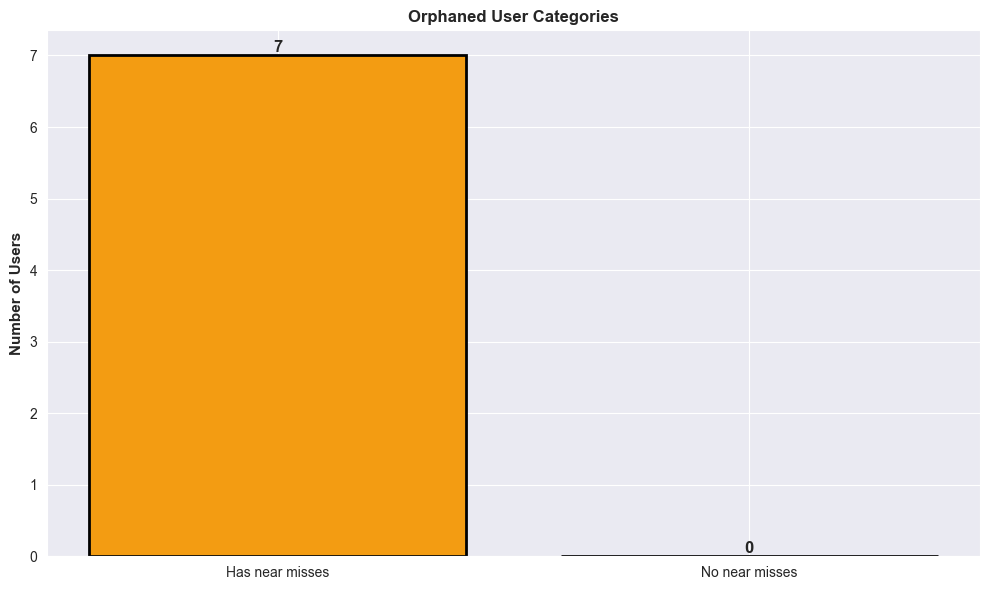


‚úÖ Orphaned users analysis complete!


In [13]:
# Analyze orphaned users
# Ensure required columns exist
if 'in_any_bloc' not in df.columns:
    df['in_any_bloc'] = df[bloc_columns].any(axis=1)
if 'bloc_count' not in df.columns:
    df['bloc_count'] = df[bloc_columns].sum(axis=1)

orphaned_users = df[~df['in_any_bloc']][['username', 'total_near_misses'] + dimensions + near_miss_cols]

print("=" * 70)
print("ORPHANED USERS ANALYSIS")
print("=" * 70)
print(f"\nüìä Total orphaned users: {len(orphaned_users)}")
print(f"   ‚Ä¢ With near misses: {(orphaned_users['total_near_misses'] > 0).sum()}")
print(f"   ‚Ä¢ Without near misses: {(orphaned_users['total_near_misses'] == 0).sum()}")

orphaned_with_near_miss = orphaned_users[orphaned_users['total_near_misses'] > 0]
if len(orphaned_with_near_miss) > 0:
    print(f"\nüéØ Orphaned users who nearly qualified:\n")
    display_cols = ['username', 'total_near_misses', 'trade_score', 'abortion_score', 'migration_score', 'economics_score', 'rights_score']
    print(orphaned_with_near_miss[display_cols].sort_values('total_near_misses', ascending=False).to_string(index=False))
    
    # Show which blocs they nearly qualified for
    print(f"\nüìã Specific near-miss blocs for orphaned users:\n")
    for idx, row in orphaned_with_near_miss.iterrows():
        near_blocs = []
        if row['post_scarcity_near']: near_blocs.append('Post-Scarcity')
        if row['builder_near']: near_blocs.append('Builder')
        if row['abundance_near']: near_blocs.append('Abundance')
        if row['localist_near']: near_blocs.append('Localist')
        if row['natcon_near']: near_blocs.append('NatCon')
        if row['postlib_near']: near_blocs.append('Postliberal')
        
        if near_blocs:
            print(f"   ‚Ä¢ {row['username']}: {', '.join(near_blocs)}")

orphaned_no_near_miss = orphaned_users[orphaned_users['total_near_misses'] == 0]
if len(orphaned_no_near_miss) > 0:
    print(f"\n‚ùå Truly orphaned users (no near misses):\n")
    print(orphaned_no_near_miss[display_cols].to_string(index=False))

# Visualize orphaned user categories
fig, ax = plt.subplots(figsize=(10, 6))
orphan_categories = {
    'Has near misses': (orphaned_users['total_near_misses'] > 0).sum(),
    'No near misses': (orphaned_users['total_near_misses'] == 0).sum()
}
colors = ['#f39c12', '#e74c3c']
bars = ax.bar(orphan_categories.keys(), orphan_categories.values(), color=colors, edgecolor='black', linewidth=2)
ax.set_ylabel('Number of Users', fontsize=11, fontweight='bold')
ax.set_title('Orphaned User Categories', fontsize=12, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}', 
           ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print("‚úÖ Orphaned users analysis complete!")
print(f"{'='*70}")

## Bloc Coverage Summary

In [14]:
total_users = len(df)
df['bloc_count'] = df[bloc_columns].sum(axis=1)
orphaned = (~df['in_any_bloc']).sum()
multi_bloc = (df['bloc_count'] > 1).sum()
single_bloc = (df['bloc_count'] == 1).sum()

print("=" * 70)
print("BLOC COVERAGE SUMMARY")
print("=" * 70)
print(f"\\nTotal Users: {total_users}")
print(f"\\nCoverage:")
print(f"  ‚úì In at least one bloc: {total_users-orphaned} ({(total_users-orphaned)/total_users*100:.1f}%)")
print(f"  ‚úó Orphaned (no bloc): {orphaned} ({orphaned/total_users*100:.1f}%)")
print(f"\\nOverlap:")
print(f"  ‚Ä¢ Exactly one bloc: {single_bloc} ({single_bloc/total_users*100:.1f}%)")
print(f"  ‚Ä¢ Multiple blocs: {multi_bloc} ({multi_bloc/total_users*100:.1f}%)")
print(f"  ‚Ä¢ Max blocs per user: {df['bloc_count'].max()}")

print(f"\\n{'Bloc':<25} {'Members':<10} {'% of Total':<12} {'Avg Blocs/User'}")
print("-" * 70)
for col in bloc_columns:
    bloc_name = BLOC_NAMES[col]
    count = df[col].sum()
    pct = (count / total_users) * 100
    avg_other = df[df[col]]['bloc_count'].mean() if count > 0 else 0
    print(f"{bloc_name:<25} {count:<10} {pct:>6.1f}%      {avg_other:>5.2f}")

print("\\n" + "=" * 70)
print("RECOMMENDATIONS")
print("=" * 70)

orphan_pct = (orphaned / total_users) * 100
if orphan_pct > 20:
    print("\\n‚ö†Ô∏è  HIGH ORPHAN RATE: >20% don't fit any bloc")
elif orphan_pct > 10:
    print("\\n‚ö° MODERATE ORPHAN RATE: 10-20% don't fit any bloc")
else:
    print("\\n‚úÖ GOOD COVERAGE: <10% orphaned users")

multi_pct = (multi_bloc / total_users) * 100
if multi_pct > 50:
    print("\\n‚ö†Ô∏è  HIGH OVERLAP: >50% in multiple blocs")
elif multi_pct > 30:
    print("\\n‚ö° MODERATE OVERLAP: 30-50% in multiple blocs")
else:
    print("\\n‚úÖ GOOD EXCLUSIVITY: <30% in multiple blocs")

small_blocs = bloc_df[bloc_df['Count'] < total_users * 0.05]
if len(small_blocs) > 0:
    print(f"\\n‚ö° SMALL BLOCS: {len(small_blocs)} bloc(s) <5% membership")

large_blocs = bloc_df[bloc_df['Percentage'] > 40]
if len(large_blocs) > 0:
    print(f"\\n‚ö° DOMINANT BLOCS: {len(large_blocs)} bloc(s) >40% membership")

print("\\n" + "=" * 70)

BLOC COVERAGE SUMMARY
\nTotal Users: 89
\nCoverage:
  ‚úì In at least one bloc: 82 (92.1%)
  ‚úó Orphaned (no bloc): 7 (7.9%)
\nOverlap:
  ‚Ä¢ Exactly one bloc: 41 (46.1%)
  ‚Ä¢ Multiple blocs: 41 (46.1%)
  ‚Ä¢ Max blocs per user: 3
\nBloc                      Members    % of Total   Avg Blocs/User
----------------------------------------------------------------------
Postscarcity Syndicate    40           44.9%       1.57
Builder Bloc              22           24.7%       2.41
Abundance Alliance        45           50.6%       2.07
Localist League           22           24.7%       1.64
NatCon Corps              2             2.2%       2.00
Postliberal Front         1             1.1%       1.00
\n======================================================================
RECOMMENDATIONS
\n‚úÖ GOOD COVERAGE: <10% orphaned users
\n‚ö° MODERATE OVERLAP: 30-50% in multiple blocs
\n‚ö° SMALL BLOCS: 2 bloc(s) <5% membership
\n‚ö° DOMINANT BLOCS: 2 bloc(s) >40% membership
\n====================

## Orphaned Users Analysis

Orphaned Users: 7 (7.9%)
\nOrphaned users:
  @kingmodaser: T=3, A=0, M=0, E=4, R=6
  @biggals: T=0, A=1, M=6, E=4, R=2
  @oladotun: T=1, A=6, M=6, E=3, R=0
  @tapjoy: T=1, A=4, M=6, E=0, R=3
  @tohpac1: T=0, A=1, M=2, E=5, R=4
  @wayseeker: T=4, A=2, M=0, E=4, R=0
  @azbest: T=4, A=0, M=2, E=4, R=0
\nOrphaned User Statistics:
------------------------------------------------------------
Trade           Avg: 1.86
Abortion        Avg: 2.00
Migration       Avg: 3.14
Economics       Avg: 3.43
Rights          Avg: 2.14


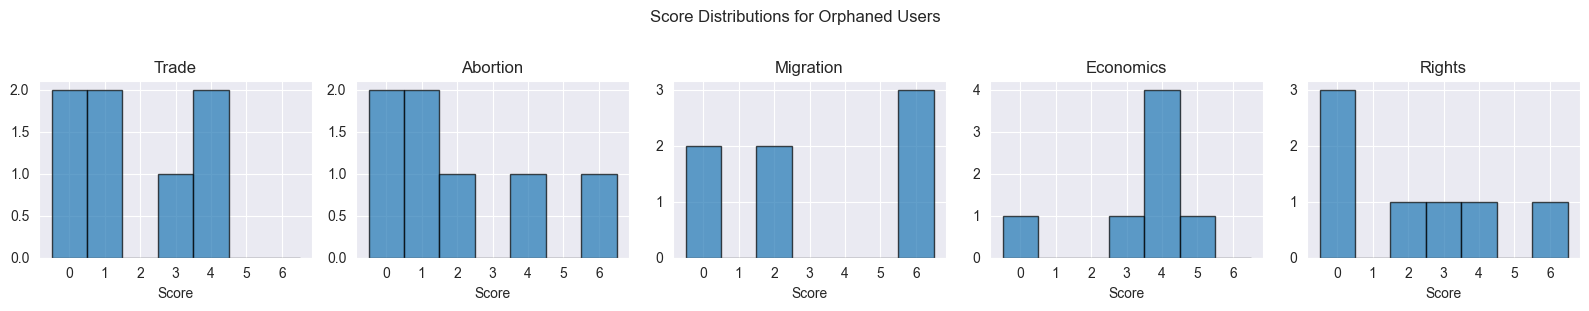

In [15]:
orphaned = df[~df['in_any_bloc']].copy()

print(f"Orphaned Users: {len(orphaned)} ({len(orphaned)/len(df)*100:.1f}%)")
print("="*70)

if len(orphaned) > 0:
    print(f"\\nOrphaned users:")
    for idx, row in orphaned.iterrows():
        print(f"  @{row['username']}: T={row['trade_score']}, A={row['abortion_score']}, M={row['migration_score']}, E={row['economics_score']}, R={row['rights_score']}")
    
    print(f"\\nOrphaned User Statistics:")
    print("-" * 60)
    for dim in dimensions:
        print(f"{dim.replace('_score', '').title():<15} Avg: {orphaned[dim].mean():.2f}")
    
    # Distribution
    fig, axes = plt.subplots(1, 5, figsize=(16, 3))
    for idx, dim in enumerate(dimensions):
        axes[idx].hist(orphaned[dim], bins=7, range=(-0.5, 6.5), alpha=0.7, edgecolor='black')
        axes[idx].set_title(dim.replace('_score', '').title())
        axes[idx].set_xlabel('Score')
        axes[idx].set_xticks(range(7))
    plt.suptitle('Score Distributions for Orphaned Users', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("\\n‚úÖ No orphaned users!")

## Bloc Overlap Analysis

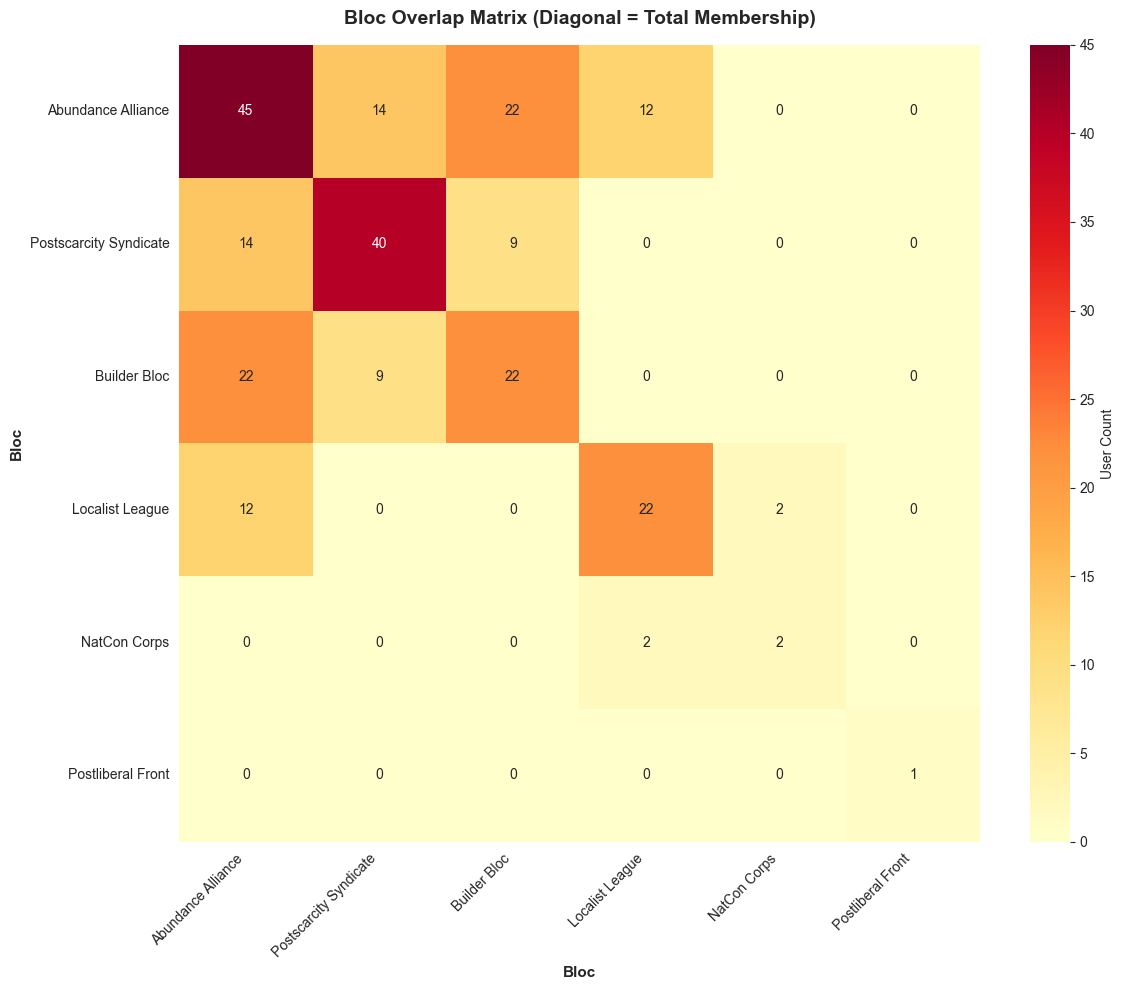

In [16]:
# Create overlap matrix
overlap_matrix = pd.DataFrame(index=bloc_df['Bloc'], columns=bloc_df['Bloc'], dtype=int)

for bloc1_id, bloc1_name in BLOC_NAMES.items():
    for bloc2_id, bloc2_name in BLOC_NAMES.items():
        if bloc1_name == bloc2_name:
            overlap_matrix.loc[bloc1_name, bloc2_name] = df[bloc1_id].sum()
        else:
            overlap_matrix.loc[bloc1_name, bloc2_name] = (df[bloc1_id] & df[bloc2_id]).sum()

overlap_matrix = overlap_matrix.astype(int)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(overlap_matrix, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'User Count'})
plt.title('Bloc Overlap Matrix (Diagonal = Total Membership)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Bloc', fontsize=11, fontweight='bold')
plt.ylabel('Bloc', fontsize=11, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Bloc System Quality Report

In [17]:
# Prepare data
df['blocs'] = df.apply(lambda row: [BLOC_NAMES[col] for col in bloc_columns if row[col]], axis=1)

orphaned_count = (~df['in_any_bloc']).sum()
users_in_any_bloc = df['in_any_bloc'].sum()
exclusive_users = (df['bloc_count'] == 1).sum()
multi_bloc_users = (df['bloc_count'] > 1).sum()

print("="*70)
print("BLOC SYSTEM QUALITY REPORT")
print("="*70)

coverage_rate = (users_in_any_bloc / total_users) * 100
avg_memberships = df['blocs'].apply(len).mean()

print(f"\\nüìä Coverage Metrics:")
print(f"   ‚Ä¢ Total users: {total_users:,}")
print(f"   ‚Ä¢ In at least one bloc: {users_in_any_bloc:,} ({coverage_rate:.1f}%)")
print(f"   ‚Ä¢ Orphaned: {orphaned_count:,} ({orphaned_count/total_users*100:.1f}%)")

print(f"\\nüéØ Coherence Metrics:")
print(f"   ‚Ä¢ Avg blocs per member: {avg_memberships:.2f}")
print(f"   ‚Ä¢ Exclusive members (1 bloc): {exclusive_users:,} ({exclusive_users/users_in_any_bloc*100:.1f}%)")
print(f"   ‚Ä¢ Multi-bloc members: {multi_bloc_users:,} ({multi_bloc_users/users_in_any_bloc*100:.1f}%)")

quality_score = (coverage_rate * 0.4) + ((exclusive_users / users_in_any_bloc * 100) * 0.3) + ((users_in_any_bloc / total_users * 100) * 0.3)

print(f"\\n‚≠ê Overall Quality Score: {quality_score:.1f}/100")
print(f"   (40% coverage + 30% exclusivity + 30% capture)")
print("\\n" + "="*70)

BLOC SYSTEM QUALITY REPORT
\nüìä Coverage Metrics:
   ‚Ä¢ Total users: 89
   ‚Ä¢ In at least one bloc: 82 (92.1%)
   ‚Ä¢ Orphaned: 7 (7.9%)
\nüéØ Coherence Metrics:
   ‚Ä¢ Avg blocs per member: 1.48
   ‚Ä¢ Exclusive members (1 bloc): 41 (50.0%)
   ‚Ä¢ Multi-bloc members: 41 (50.0%)
\n‚≠ê Overall Quality Score: 79.5/100
   (40% coverage + 30% exclusivity + 30% capture)
\n======================================================================


## Visualization Dashboard

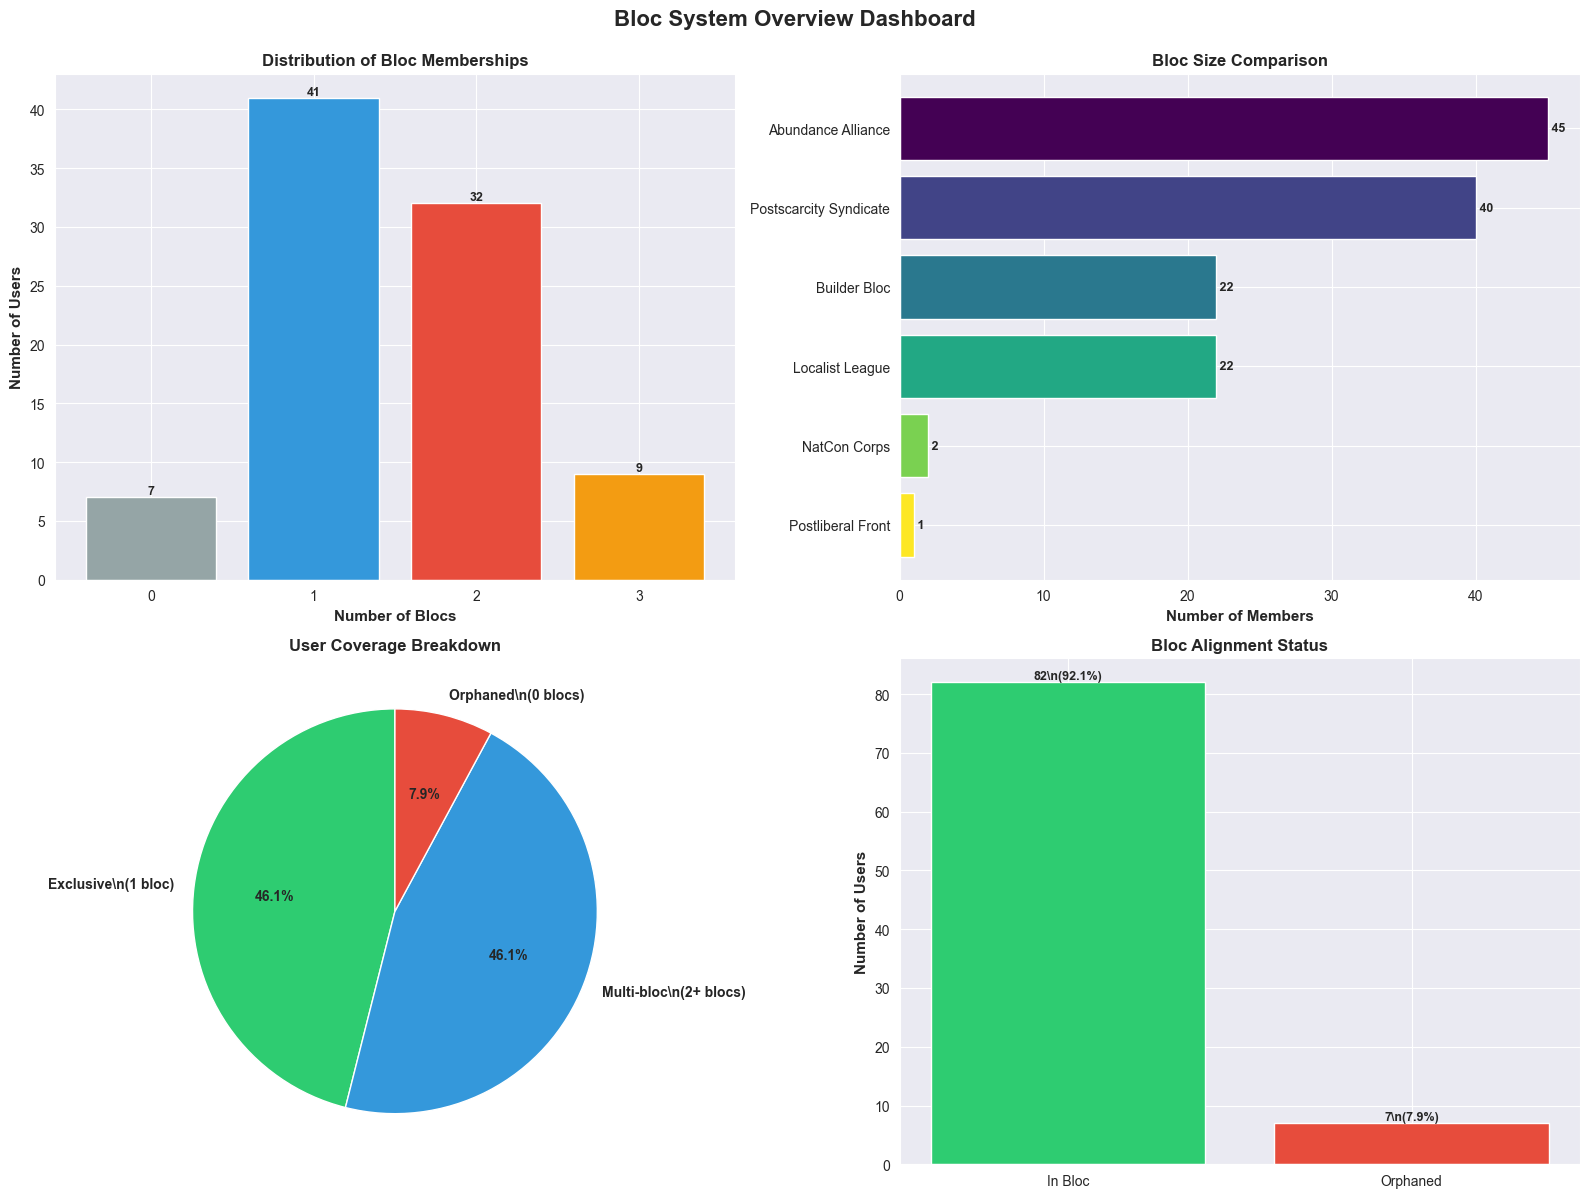

\n‚úÖ Bloc exploration complete!


In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Membership count distribution
membership_counts = df['blocs'].apply(len).value_counts().sort_index()
ax1 = axes[0, 0]
bars = ax1.bar(membership_counts.index, membership_counts.values, color=['#95a5a6', '#3498db', '#e74c3c', '#f39c12', '#9b59b6', '#2ecc71'])
ax1.set_xlabel('Number of Blocs', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Users', fontsize=11, fontweight='bold')
ax1.set_title('Distribution of Bloc Memberships', fontsize=12, fontweight='bold')
ax1.set_xticks(range(0, max(membership_counts.index) + 1))
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Bloc size comparison
ax2 = axes[0, 1]
colors_bar = plt.cm.viridis(np.linspace(0, 1, len(bloc_df)))
bars = ax2.barh(bloc_df['Bloc'], bloc_df['Count'], color=colors_bar)
ax2.set_xlabel('Number of Members', fontsize=11, fontweight='bold')
ax2.set_title('Bloc Size Comparison', fontsize=12, fontweight='bold')
ax2.invert_yaxis()
for bar in bars:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2., f' {int(width):,}', ha='left', va='center', fontsize=9, fontweight='bold')

# 3. Coverage breakdown (pie)
ax3 = axes[1, 0]
coverage_data = {'Exclusive\\n(1 bloc)': exclusive_users, 'Multi-bloc\\n(2+ blocs)': multi_bloc_users, 'Orphaned\\n(0 blocs)': orphaned_count}
colors_pie = ['#2ecc71', '#3498db', '#e74c3c']
ax3.pie(coverage_data.values(), labels=coverage_data.keys(), autopct='%1.1f%%', colors=colors_pie, startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax3.set_title('User Coverage Breakdown', fontsize=12, fontweight='bold')

# 4. Alignment status
ax4 = axes[1, 1]
alignment_data = {'In Bloc': users_in_any_bloc, 'Orphaned': orphaned_count}
colors_align = ['#2ecc71', '#e74c3c']
bars = ax4.bar(range(len(alignment_data)), alignment_data.values(), color=colors_align)
ax4.set_xticks(range(len(alignment_data)))
ax4.set_xticklabels(alignment_data.keys(), fontsize=10)
ax4.set_ylabel('Number of Users', fontsize=11, fontweight='bold')
ax4.set_title('Bloc Alignment Status', fontsize=12, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height, f'{int(height):,}\\n({height/total_users*100:.1f}%)', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Bloc System Overview Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\\n‚úÖ Bloc exploration complete!")